In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
food=pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv",encoding='latin-1')

In [5]:
food.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [7]:
#find the standard deviation and mean of all years
food.agg(["mean","std"])

C:\Users\HP\AppData\Local\Temp\ipykernel_9744\344530503.py:2: FutureWarning: ['Area', 'Item', 'Element', 'Unit'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  food.agg(["mean","std"])


,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658


In [8]:
#specifying columns; say mean and std for Y2015 and Y2018

food.agg({"Y2015":["mean","std"], "Y2018":["std"]})

,Y2015,Y2018
mean,135.235966,NaN
std,1603.403984,1710.782658


In [12]:
food.groupby("Area").agg(mean_area_2021=("Y2015","mean"),std_area_std=("Y2018","std"))

,mean_area_2021,std_area_std
Area,,
Algeria,255.566562,1590.356861
Angola,152.079586,1137.007472
Benin,85.858040,545.635050
Botswana,16.818736,113.793798
Burkina Faso,74.855117,646.445752
Cabo Verde,11.829886,107.229191
Cameroon,156.078115,911.207104
Central African Republic,22.288071,166.536536
Chad,50.526385,471.707604


C:\Users\HP\AppData\Local\Temp\ipykernel_9744\696280523.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50)


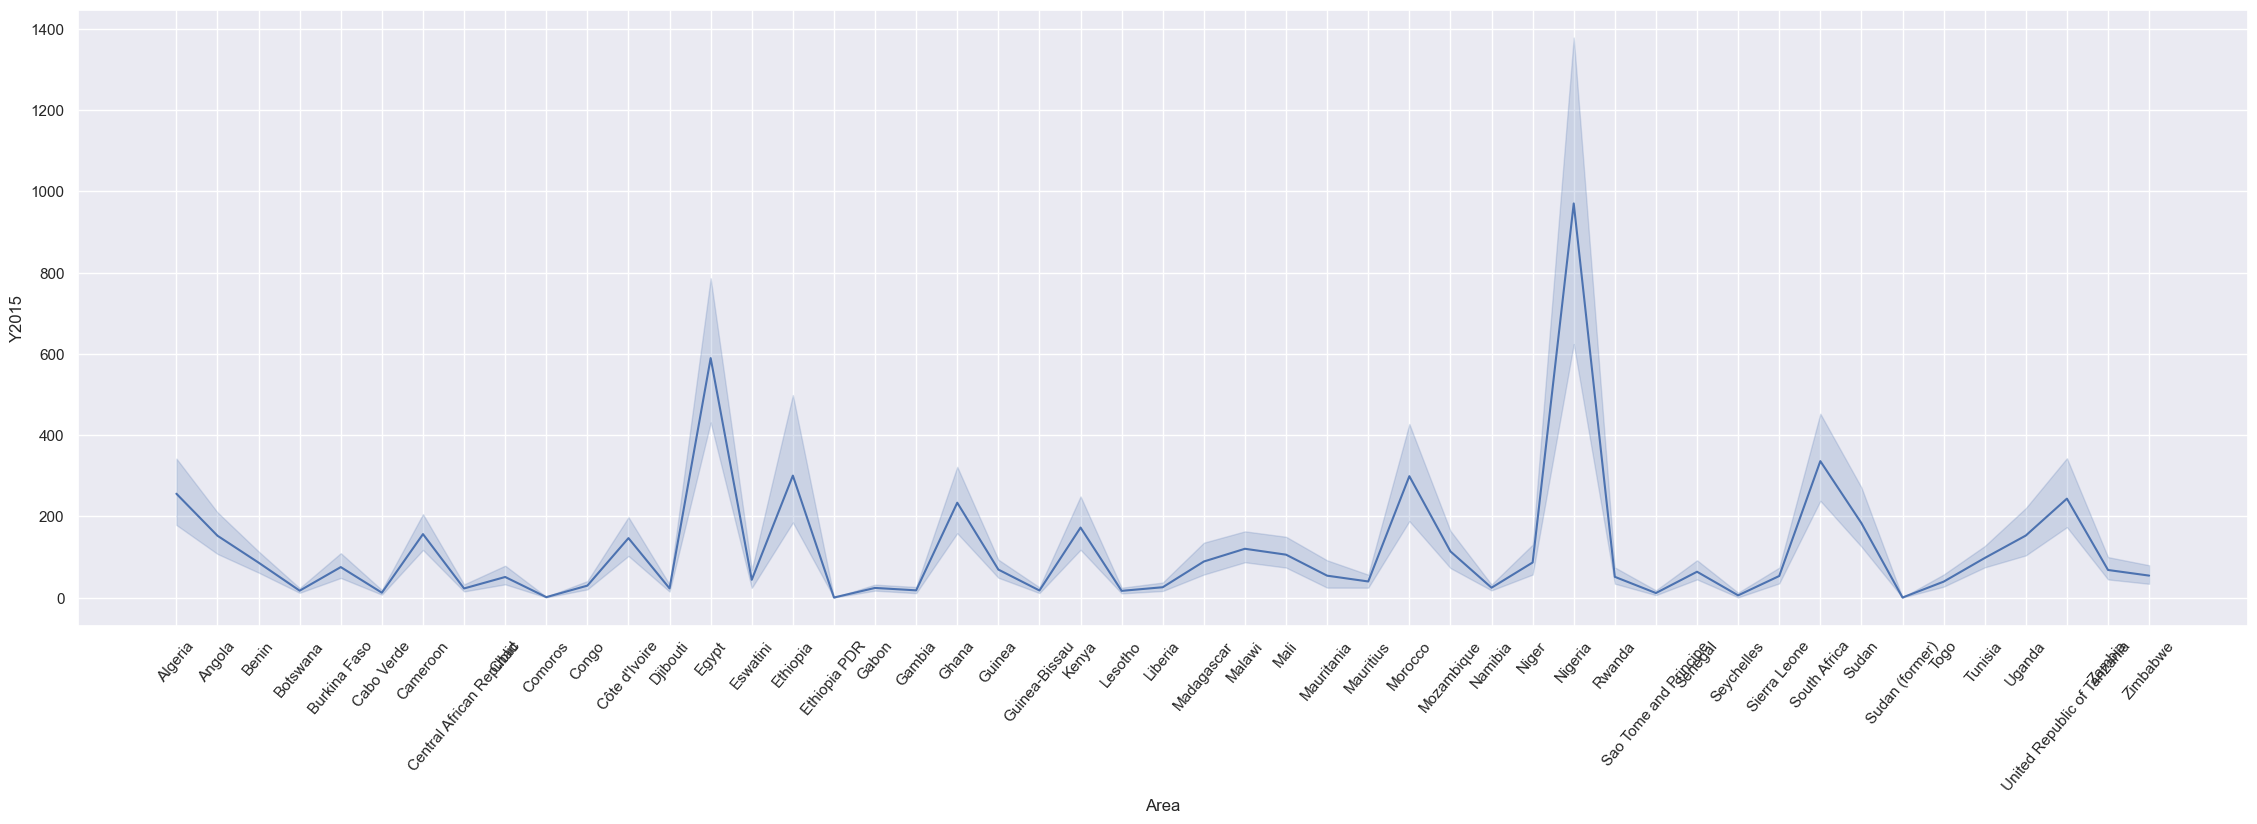

In [29]:
width = 28
height = 8
#sns.set(rc = {'figure.figsize':(width,height)})
plt.figure(figsize=(width, height))
ax=sns.lineplot(data=food,x="Area",y="Y2015",)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.show()

# checking for missing values

In [32]:
#checking for missing values in column Y2017
print(food.isna().sum())

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64


In [36]:
#Dropping missing values
threshold=len(food)*0.05
cols_to_drop=food.columns[food.isna().sum()<=threshold]
print(cols_to_drop)

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')


In [40]:
#imputing summary statistics
cols_missing_values=food.columns[food.isna().sum()>0]
print(cols_missing_values)

Index(['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'], dtype='object')


In [46]:
for col in cols_missing_values[:-1]:
    food[col].fillna(food[col].mode()[0],inplace=True)

In [47]:
#checking for missing values in column Y2017
print(food.isna().sum())

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014              0
Y2015              0
Y2016              0
Y2017              0
Y2018           1436
dtype: int64


In [56]:
food_dict=food.groupby("Element")["Y2018"].median().to_dict()

In [57]:
print(food_dict)

{'Domestic supply quantity': 7.0, 'Export Quantity': 0.0, 'Fat supply quantity (g/capita/day)': 0.03, 'Feed': 0.2, 'Food': 5.38, 'Food supply (kcal/capita/day)': 3.0, 'Food supply quantity (kg/capita/yr)': 0.6, 'Import Quantity': 0.48, 'Losses': 4.0, 'Other uses (non-food)': 0.0, 'Processing': 0.0, 'Production': 16.0, 'Protein supply quantity (g/capita/day)': 0.03, 'Residuals': 0.0, 'Seed': 4.0, 'Stock Variation': 0.0, 'Total Population - Both sexes': 15478.0, 'Tourist consumption': 0.0}


In [58]:
food["Y2018"]=food["Y2018"].fillna(food["Element"].map(food_dict))

In [59]:
#checking for missing values in column Y2017
print(food.isna().sum())

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64


In [61]:
food.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [63]:
print(food.select_dtypes("object"))

           Area           Item                                 Element  \
0       Algeria     Population           Total Population - Both sexes   
1       Algeria     Population                Domestic supply quantity   
2       Algeria    Grand Total           Food supply (kcal/capita/day)   
3       Algeria    Grand Total  Protein supply quantity (g/capita/day)   
4       Algeria    Grand Total      Fat supply quantity (g/capita/day)   
...         ...            ...                                     ...   
60938  Zimbabwe  Miscellaneous                                    Food   
60939  Zimbabwe  Miscellaneous     Food supply quantity (kg/capita/yr)   
60940  Zimbabwe  Miscellaneous           Food supply (kcal/capita/day)   
60941  Zimbabwe  Miscellaneous  Protein supply quantity (g/capita/day)   
60942  Zimbabwe  Miscellaneous      Fat supply quantity (g/capita/day)   

                  Unit  
0         1000 persons  
1          1000 tonnes  
2      kcal/capita/day  
3         g

In [67]:
food["Item"].value_counts()

Milk - Excluding Butter     1262
Eggs                        1142
Miscellaneous                911
Cereals - Excluding Beer     714
Oilcrops                     706
                            ... 
Grand Total                  135
Animal Products              135
Vegetal Products             135
Sugar non-centrifugal        121
Population                    90
Name: Item, Length: 119, dtype: int64

In [68]:
food.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [69]:
#counting unique values in a column
print(food["Item"].nunique())

119


In [73]:
#extracting value from categories
food["Item"].str.contains('Total')

0        False
1        False
2         True
3         True
4         True
         ...  
60938    False
60939    False
60940    False
60941    False
60942    False
Name: Item, Length: 60943, dtype: bool

In [75]:
#extracting for multiple phrases in strings
food["Item"].str.contains('Total|Products')

0        False
1        False
2         True
3         True
4         True
         ...  
60938    False
60939    False
60940    False
60941    False
60942    False
Name: Item, Length: 60943, dtype: bool

In [76]:
#filtering for alues that start with a certain word
#say, we are filtering for items in this dataset that start with a "Grand"
food["Item"].str.contains("^Grand")

0        False
1        False
2         True
3         True
4         True
         ...  
60938    False
60939    False
60940    False
60941    False
60942    False
Name: Item, Length: 60943, dtype: bool

In [84]:
#Finding a list of Job titles you want to find
job_categories=["Grand Total","Population","Animal Products","Vegetable Products"]
#create variables for filters
gt="Grand Total"
pop="Population"
ani_prod="Animal Products"
veg_prod="Vegetable Products"
#creating conditions for list
conditions=[
    (food["Item"].str.contains(gt)),
     (food["Item"].str.contains(pop)),
     (food["Item"].str.contains(ani_prod)),
     (food["Item"].str.contains(veg_prod))
    
]
#creating job category  column
food["item_category"]=np.select(conditions,job_categories,default="other")
print(food[["Item","item_category"]].head())

          Item item_category
0   Population    Population
1   Population    Population
2  Grand Total   Grand Total
3  Grand Total   Grand Total
4  Grand Total   Grand Total


In [86]:
food.head(30)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018,item_category
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00,Population
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00,Population
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00,Grand Total
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83,Grand Total
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28,Grand Total
5,4,Algeria,2903,Vegetal Products,664,Food supply (kcal/capita/day),kcal/capita/day,2932.00,2958.00,2941.00,2921.00,2932.00,other
6,4,Algeria,2903,Vegetal Products,674,Protein supply quantity (g/capita/day),g/capita/day,67.14,67.38,67.37,66.11,67.10,other
7,4,Algeria,2903,Vegetal Products,684,Fat supply quantity (g/capita/day),g/capita/day,53.84,54.72,52.04,55.59,54.57,other
8,4,Algeria,2941,Animal Products,664,Food supply (kcal/capita/day),kcal/capita/day,444.00,421.00,431.00,421.00,390.00,Animal Products
9,4,Algeria,2941,Animal Products,674,Protein supply quantity (g/capita/day),g/capita/day,27.76,26.97,27.35,26.71,24.73,Animal Products


In [87]:
planes



NameError: name 'planes' is not defined